<a href="https://colab.research.google.com/github/gayathrikarumuri/WasteSegregation/blob/main/Wastesegregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gayathrikarumuri","key":"df79e06d848717bf9ccf35ec085d27eb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset using its slug
!kaggle datasets download -d asdasdasasdas/garbage-classification

# Unzip it
!unzip garbage-classification.zip -d garbage_dataset


Streaming output truncated to the last 5000 lines.
  inflating: garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: g

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set image size and batch
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

# Determine the number of classes from the directory structure
dataset_path = "garbage_dataset/Garbage classification/Garbage classification"
if not os.path.exists(dataset_path):
    dataset_path = "garbage_dataset" # Fallback in case of different unzipping structure

num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])
print(f"Detected {num_classes} classes.")


train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

Detected 6 classes.
Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Use num_classes here
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_new = model.fit(
    train_data,
    epochs=10, # You can adjust the number of epochs
    validation_data=val_data
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.2844 - loss: 1.7426 - val_accuracy: 0.4056 - val_loss: 1.5071
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4665 - loss: 1.3367 - val_accuracy: 0.3956 - val_loss: 1.4594
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.5446 - loss: 1.1874 - val_accuracy: 0.4274 - val_loss: 1.4830
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6125 - loss: 1.0793 - val_accuracy: 0.4811 - val_loss: 1.3303
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6151 - loss: 1.0110 - val_accuracy: 0.4692 - val_loss: 1.3695
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6068 - loss: 1.0091 - val_accuracy: 0.4970 - val_loss: 1.3873
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6464 - loss: 0.9620 - val_accuracy: 0.5408 - val_loss: 1.2474
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.7062 - loss: 0.8382 - val_accuracy: 0.5746 - val_l

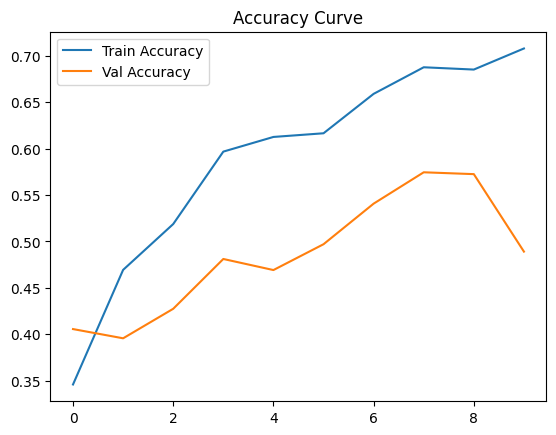

In [ ]:

plt.plot(history_new.history['accuracy'], label='Train Accuracy')
plt.plot(history_new.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

In [ ]:
model.save("garbage_classifier_model.h5")


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = 'garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard70.jpg' # Change accordingly
img = image.load_img('garbage_dataset/Garbage classification/Garbage classification/cardboard/cardboard70.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
classes = list(train_data.class_indices.keys())
print("Predicted class:", classes[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class: cardboard
